In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem
from split_data import split_data

In [2]:
estimator = "DR"
competition = "L"
agent_num = 6
special = 'adaptiveTrain_extra_3_parti_4'
extra = 3

# Normal Data

In [3]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_extra_3.json')

In [4]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
agents_part1 = agents[:3]
agents_part2 = agents[agent_num-extra:]
agents2items_part2 = {}
agents2item_values_part2 = {}

for n in range(extra):
    agents2items_part2[f'DR {n+4}'] = agents2items.pop(f'DR {n+4}')
    agents2item_values_part2[f'DR {n+4}'] = agents2item_values.pop(f'DR {n+4}')

agents2items_part1 = agents2items
agents2item_values_part1 = agents2item_values


# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items_part1,
                        agents2item_values_part1,
                        agents_part1,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  40%|████      | 6634/16384 [00:01<00:02, 3998.66it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 6634



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4430.81it/s]


AUC predicting P(win):				 0.8217993618901666
Estimated Utility	 Mean Error:			 0.3751037524353457
Estimated Utility	 Mean Absolute Error:	 0.39321825075681655



Initialising Policy: 100%|██████████| 16384/16384 [00:12<00:00, 1339.66it/s]


Predicted mu Gammas:  tensor(0.9907, grad_fn=<MinBackward1>) tensor(1.0155, grad_fn=<MaxBackward1>) tensor(1.0005, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0325, grad_fn=<MinBackward1>) tensor(0.0890, grad_fn=<MaxBackward1>) tensor(0.0501, grad_fn=<MeanBackward0>)



DR 1:  36%|███▌      | 11863/32768 [00:14<00:24, 844.83it/s]


Stopping at Epoch 11863
DR 1 Number of samples:  torch.Size([6688, 2])
DR 1 Predicted Gammas:  0.6506283 0.96656406 0.76577586
agent: 1




DR 2:  29%|██▊       | 4685/16384 [00:01<00:03, 3018.93it/s]


Stopping at Epoch 4685



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4458.13it/s]


AUC predicting P(win):				 0.8283721167400555
Estimated Utility	 Mean Error:			 0.6590468556484328
Estimated Utility	 Mean Absolute Error:	 0.7049442412891157



Initialising Policy:  70%|██████▉   | 11453/16384 [00:08<00:03, 1337.15it/s]


Stopping at Epoch 11453
Predicted mu Gammas:  tensor(0.9967, grad_fn=<MinBackward1>) tensor(1.0034, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0380, grad_fn=<MinBackward1>) tensor(0.1085, grad_fn=<MaxBackward1>) tensor(0.0497, grad_fn=<MeanBackward0>)



DR 2:  29%|██▊       | 9350/32768 [00:10<00:26, 869.07it/s]


Stopping at Epoch 9350
DR 2 Number of samples:  torch.Size([6692, 2])
DR 2 Predicted Gammas:  0.61386865 1.0 0.7543757
agent: 2




DR 3:  33%|███▎      | 5345/16384 [00:01<00:02, 4201.19it/s]


Stopping at Epoch 5345



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4607.29it/s]


AUC predicting P(win):				 0.7228014165606896
Estimated Utility	 Mean Error:			 0.3451421936360006
Estimated Utility	 Mean Absolute Error:	 0.3607466650787586



Initialising Policy: 100%|██████████| 16384/16384 [00:11<00:00, 1371.20it/s]


Predicted mu Gammas:  tensor(0.9705, grad_fn=<MinBackward1>) tensor(1.0123, grad_fn=<MaxBackward1>) tensor(0.9992, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0384, grad_fn=<MinBackward1>) tensor(0.0789, grad_fn=<MaxBackward1>) tensor(0.0503, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 86/32768 [00:00<00:38, 853.79it/s]

Epoch 00126: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 261/32768 [00:00<00:37, 869.36it/s]

Epoch 00227: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 348/32768 [00:00<00:37, 866.67it/s]

Epoch 00328: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 435/32768 [00:00<00:37, 859.73it/s]

Epoch 00429: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 545/32768 [00:00<00:37, 853.96it/s]

Epoch 00530: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 545
DR 3 Number of samples:  torch.Size([6620, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1



agent: 0




DR 1:   7%|▋         | 1151/16384 [00:00<00:02, 6627.14it/s][A


Stopping at Epoch 1151
AUC predicting P(win):				 0.8116476097593467
Estimated Utility	 Mean Error:			 -0.013030253145453096
Estimated Utility	 Mean Absolute Error:	 0.07283482409168793



DR 1:  18%|█▊        | 6010/32768 [00:01<00:05, 4606.77it/s]

Epoch 05398: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05854: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06111: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  22%|██▏       | 7105/32768 [00:01<00:05, 4596.63it/s]


Epoch 06368: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06625: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06882: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7105
AUC predicting P(win):				 0.8271130157295647
Estimated Utility	 Mean Error:			 -0.0016328821137098855
Estimated Utility	 Mean Absolute Error:	 0.0764971448588912



DR 1:   2%|▏         | 533/32768 [00:00<00:36, 888.19it/s]

Epoch 00420: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   4%|▍         | 1448/32768 [00:01<00:35, 885.56it/s]


Stopping at Epoch 1448
DR 1 Number of samples:  torch.Size([6659, 2])
DR 1 Predicted Gammas:  0.67991793 1.0 0.89772433
agent: 1




DR 2:  22%|██▏       | 3572/16384 [00:01<00:03, 3535.22it/s]


Stopping at Epoch 3572
AUC predicting P(win):				 0.6823585575983657
Estimated Utility	 Mean Error:			 0.14384319461009196
Estimated Utility	 Mean Absolute Error:	 0.3120735345945781



DR 2:  15%|█▍        | 4853/32768 [00:01<00:06, 4426.07it/s]

Epoch 04229: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04606: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04863: reducing learning rate of group 0 to 2.4000e-05.
Epoch 05120: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  19%|█▊        | 6109/32768 [00:01<00:06, 4401.98it/s]


Epoch 05377: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05634: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05891: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 6109
AUC predicting P(win):				 0.6873045327910008
Estimated Utility	 Mean Error:			 0.18355783528610164
Estimated Utility	 Mean Absolute Error:	 0.33726191414069046



DR 2:   8%|▊         | 2523/32768 [00:02<00:35, 845.54it/s]


Stopping at Epoch 2523
DR 2 Number of samples:  torch.Size([6727, 2])
DR 2 Predicted Gammas:  0.50846076 0.9659442 0.7505632
agent: 2




DR 3:  21%|██        | 3402/16384 [00:01<00:04, 2992.42it/s]


Stopping at Epoch 3402
AUC predicting P(win):				 0.862095876314148
Estimated Utility	 Mean Error:			 0.2282862606625935
Estimated Utility	 Mean Absolute Error:	 0.37883608850047334



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4596.10it/s]


AUC predicting P(win):				 0.872681879892443
Estimated Utility	 Mean Error:			 0.2282862606625935
Estimated Utility	 Mean Absolute Error:	 0.37883608850047334



DR 3:   0%|          | 88/32768 [00:00<00:37, 878.90it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 267/32768 [00:00<00:36, 887.64it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 356/32768 [00:00<00:38, 842.34it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 441/32768 [00:00<00:38, 842.49it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 527/32768 [00:00<00:38, 847.70it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.



DR 3:   2%|▏         | 612/32768 [00:00<00:37, 847.85it/s]

Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   2%|▏         | 700/32768 [00:00<00:37, 857.10it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.



DR 3:   3%|▎         | 873/32768 [00:01<00:37, 856.05it/s]

Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.



DR 3:   3%|▎         | 975/32768 [00:01<00:37, 854.99it/s]

Stopping at Epoch 975
DR 3 Number of samples:  torch.Size([6614, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 2



agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4925.09it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8112832655297026
Estimated Utility	 Mean Error:			 -0.019840159269607627
Estimated Utility	 Mean Absolute Error:	 0.17026488410728582



DR 1:  14%|█▍        | 4564/32768 [00:01<00:06, 4544.62it/s]

Epoch 03934: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04203: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04460: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04717: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  17%|█▋        | 5489/32768 [00:01<00:06, 4527.70it/s]


Epoch 04974: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05231: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05488: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5489
AUC predicting P(win):				 0.8176529918040375
Estimated Utility	 Mean Error:			 -0.012474219282848862
Estimated Utility	 Mean Absolute Error:	 0.17295301594374338



DR 1:   3%|▎         | 1034/32768 [00:01<00:36, 869.19it/s][A


Stopping at Epoch 1034
DR 1 Number of samples:  torch.Size([6660, 2])
DR 1 Predicted Gammas:  0.6431342 1.0 0.8639088
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3575.78it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.653825936206754
Estimated Utility	 Mean Error:			 -0.01672851033677438
Estimated Utility	 Mean Absolute Error:	 0.29937581825634574



DR 2:  28%|██▊       | 9115/32768 [00:02<00:05, 4536.60it/s]

Epoch 08346: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08631: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08888: reducing learning rate of group 0 to 2.4000e-05.
Epoch 09145: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  30%|███       | 9883/32768 [00:02<00:05, 4530.21it/s]


Epoch 09402: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09659: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9883
AUC predicting P(win):				 0.7018521676046385
Estimated Utility	 Mean Error:			 -0.0070261650275314485
Estimated Utility	 Mean Absolute Error:	 0.30359799365667395



DR 2:   6%|▌         | 1835/32768 [00:02<00:35, 876.34it/s]


Stopping at Epoch 1835
DR 2 Number of samples:  torch.Size([6604, 2])
DR 2 Predicted Gammas:  0.59856766 0.96869993 0.8323119
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3278.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7914249714049351
Estimated Utility	 Mean Error:			 0.02356765456634837
Estimated Utility	 Mean Absolute Error:	 0.25959919170552004



DR 3:  23%|██▎       | 7536/32768 [00:01<00:05, 4451.21it/s]

Epoch 07082: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07370: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07627: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07884: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  26%|██▌       | 8472/32768 [00:01<00:05, 4403.19it/s]


Epoch 08141: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08398: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8472
AUC predicting P(win):				 0.8219154120530974
Estimated Utility	 Mean Error:			 0.02356765456634837
Estimated Utility	 Mean Absolute Error:	 0.25959919170552004



DR 3:  14%|█▍        | 4673/32768 [00:05<00:32, 874.92it/s]


Stopping at Epoch 4673
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.9616526 1.0 0.99893683


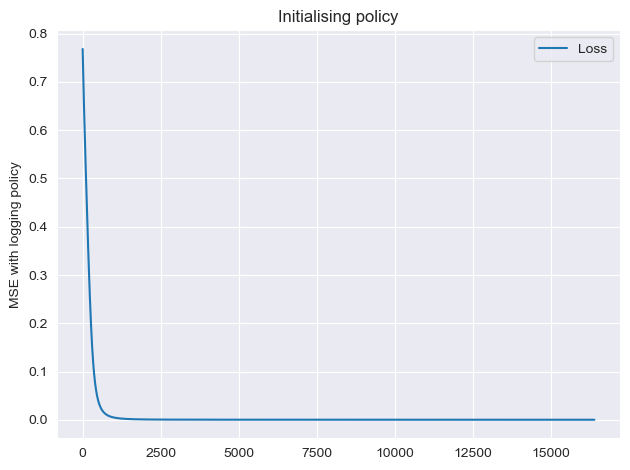

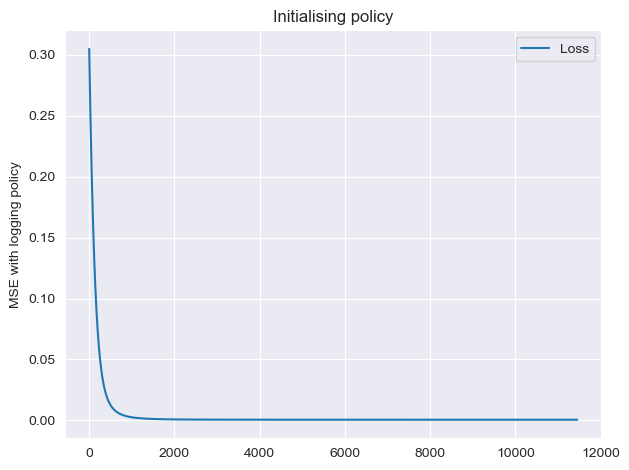

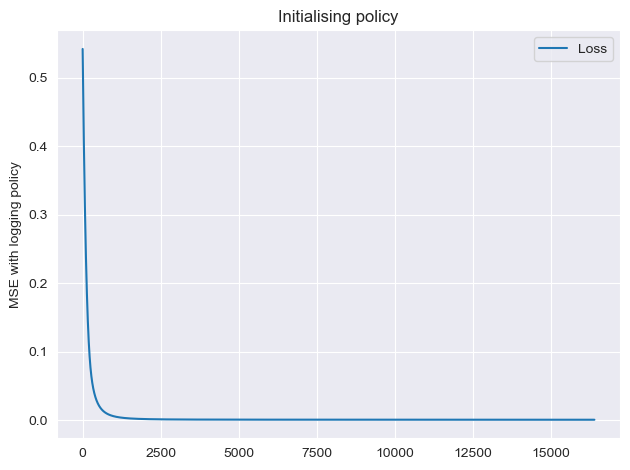

In [5]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [6]:
pickle.dump(auction, open(f'DR_L_auction_{special}_part1.pickle', 'wb'))

In [60]:
auction = pickle.load(open(f'DR_L_auction_{special}_part1.pickle', 'rb'))

# data generation

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
DR 1:   6%|▋         | 1025/16384 [00:00<00:01, 8582.36it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8895250551453295
Estimated Utility	 Mean Error:			 0.03607100538706031
Estimated Utility	 Mean Absolute Error:	 0.039872471921558794


DR 1:  21%|██        | 6805/32768 [00:03<00:13, 1929.42it/s]

Epoch 06457: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06776: reducing learning rate of group 0 to 1.2000e-04.


DR 1:  23%|██▎       | 7379/32768 [00:03<00:13, 1868.10it/s]


Epoch 07033: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07290: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 7379
AUC predicting P(win):				 0.8798519816514535
Estimated Utility	 Mean Error:			 -0.00047102839202821855
Estimated Utility	 Mean Absolute Error:	 0.004636998830806949


DR 1:   1%|          | 184/32768 [00:00<01:29, 364.27it/s]

Epoch 00116: reducing learning rate of group 0 to 1.4000e-03.


DR 1:   1%|          | 258/32768 [00:00<01:30, 360.31it/s]

Epoch 00217: reducing learning rate of group 0 to 2.8000e-04.


DR 1:   1%|          | 368/32768 [00:01<01:30, 359.43it/s]

Epoch 00318: reducing learning rate of group 0 to 5.6000e-05.


DR 1:   1%|▏         | 478/32768 [00:01<01:29, 362.20it/s]

Epoch 00419: reducing learning rate of group 0 to 1.1200e-05.


DR 1:   2%|▏         | 527/32768 [00:01<01:29, 359.32it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 00520: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 527
DR 1 Number of samples:  torch.Size([22213, 2])
DR 1 Predicted Gammas:  0.7074948 1.0 0.9013208


DR 2:   6%|▋         | 1025/16384 [00:00<00:01, 8749.76it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.805451243677461
Estimated Utility	 Mean Error:			 0.04923491484529572
Estimated Utility	 Mean Absolute Error:	 0.055851010760907635


DR 2: 100%|██████████| 32768/32768 [00:16<00:00, 1938.99it/s]


AUC predicting P(win):				 0.8065248067853461
Estimated Utility	 Mean Error:			 -0.0004684794405986579
Estimated Utility	 Mean Absolute Error:	 0.007575945245887752


DR 2:  11%|█▏        | 3735/32768 [00:10<01:19, 365.95it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 3735
DR 2 Number of samples:  torch.Size([22188, 2])
DR 2 Predicted Gammas:  0.54232234 1.0 0.85540336


DR 3:   6%|▋         | 1025/16384 [00:00<00:02, 7107.93it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8849434254603863
Estimated Utility	 Mean Error:			 -0.0017261075212093718
Estimated Utility	 Mean Absolute Error:	 0.009819779197690323


DR 3:  20%|█▉        | 6464/32768 [00:03<00:13, 1964.00it/s]

Epoch 06213: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06483: reducing learning rate of group 0 to 1.2000e-04.


DR 3:  22%|██▏       | 7052/32768 [00:03<00:13, 1933.48it/s]

Epoch 06740: reducing learning rate of group 0 to 2.4000e-05.
Epoch 06997: reducing learning rate of group 0 to 4.8000e-06.


DR 3:  23%|██▎       | 7632/32768 [00:03<00:13, 1922.84it/s]

Epoch 07254: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07511: reducing learning rate of group 0 to 1.9200e-07.


DR 3:  24%|██▎       | 7715/32768 [00:03<00:12, 1939.78it/s]


Stopping at Epoch 7715
AUC predicting P(win):				 0.8857023504341076
Estimated Utility	 Mean Error:			 -0.0017733546101613238
Estimated Utility	 Mean Absolute Error:	 0.009772532108738371


DR 3:   5%|▍         | 1483/32768 [00:03<01:24, 370.90it/s]


Stopping at Epoch 1483
DR 3 Number of samples:  torch.Size([22149, 2])
DR 3 Predicted Gammas:  0.9621409 1.0 0.9956608


DR 4:  24%|██▍       | 4001/16384 [00:20<01:02, 199.70it/s]


Stopping at Epoch 4001


DR 4: 100%|██████████| 32768/32768 [00:18<00:00, 1819.16it/s]


AUC predicting P(win):				 0.8124344709845507
Estimated Utility	 Mean Error:			 0.6600898203392213
Estimated Utility	 Mean Absolute Error:	 0.6906388363659358


Initialising Policy: 100%|██████████| 16384/16384 [00:28<00:00, 585.13it/s]


Predicted mu Gammas:  tensor(0.9889, grad_fn=<MinBackward1>) tensor(1.0278, grad_fn=<MaxBackward1>) tensor(1.0003, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0369, grad_fn=<MinBackward1>) tensor(0.1013, grad_fn=<MaxBackward1>) tensor(0.0495, grad_fn=<MeanBackward0>)


DR 4:  32%|███▏      | 10509/32768 [00:31<01:06, 333.91it/s]


Stopping at Epoch 10509
DR 4 Number of samples:  torch.Size([22399, 2])
DR 4 Predicted Gammas:  0.6272513 0.92563844 0.7212622


DR 5:  29%|██▉       | 4770/16384 [00:01<00:04, 2878.10it/s]


Stopping at Epoch 4770


DR 5: 100%|██████████| 32768/32768 [00:17<00:00, 1836.49it/s]


AUC predicting P(win):				 0.6681295512045964
Estimated Utility	 Mean Error:			 0.20821164232538522
Estimated Utility	 Mean Absolute Error:	 0.22480043883027348


Initialising Policy:  89%|████████▊ | 14520/16384 [00:25<00:03, 559.42it/s]


Stopping at Epoch 14520
Predicted mu Gammas:  tensor(0.9864, grad_fn=<MinBackward1>) tensor(1.0057, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0463, grad_fn=<MinBackward1>) tensor(0.0603, grad_fn=<MaxBackward1>) tensor(0.0507, grad_fn=<MeanBackward0>)


DR 5:  17%|█▋        | 5546/32768 [00:15<01:17, 352.09it/s]


Stopping at Epoch 5546
DR 5 Number of samples:  torch.Size([22319, 2])
DR 5 Predicted Gammas:  0.6659475 0.8342826 0.73995024


DR 6:  32%|███▏      | 5229/16384 [00:26<00:56, 197.44it/s]


Stopping at Epoch 5229


DR 6:  91%|█████████ | 29751/32768 [00:17<00:01, 1776.98it/s]

Epoch 29407: reducing learning rate of group 0 to 6.0000e-04.
Epoch 29685: reducing learning rate of group 0 to 1.2000e-04.


DR 6:  92%|█████████▏| 30283/32768 [00:17<00:01, 1759.79it/s]

Epoch 29942: reducing learning rate of group 0 to 2.4000e-05.
Epoch 30199: reducing learning rate of group 0 to 4.8000e-06.


DR 6:  93%|█████████▎| 30635/32768 [00:17<00:01, 1748.68it/s]

Epoch 30456: reducing learning rate of group 0 to 9.6000e-07.
Epoch 30713: reducing learning rate of group 0 to 1.9200e-07.


DR 6:  95%|█████████▍| 31019/32768 [00:17<00:01, 1742.20it/s]


Epoch 30970: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 31019
AUC predicting P(win):				 0.8200811474813424
Estimated Utility	 Mean Error:			 0.6818788010722372
Estimated Utility	 Mean Absolute Error:	 0.7128796707853984


Initialising Policy:  94%|█████████▍| 15372/16384 [00:26<00:01, 570.95it/s]


Stopping at Epoch 15372
Predicted mu Gammas:  tensor(0.9974, grad_fn=<MinBackward1>) tensor(1.0007, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0416, grad_fn=<MinBackward1>) tensor(0.0883, grad_fn=<MaxBackward1>) tensor(0.0505, grad_fn=<MeanBackward0>)


DR 6:  36%|███▌      | 11746/32768 [00:32<00:58, 361.59it/s]


Stopping at Epoch 11746
DR 6 Number of samples:  torch.Size([22064, 2])
DR 6 Predicted Gammas:  0.6809263 1.0 0.78191453


The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
DR 1:   6%|▋         | 1025/16384 [00:01<00:15, 1005.56it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7526446959824828
Estimated Utility	 Mean Error:			 0.011748709626815668
Estimated Utility	 Mean Absolute Error:	 0.1547659417799785


DR 1:  33%|███▎      | 10929/32768 [00:10<00:26, 839.92it/s] 

Epoch 10788: reducing learning rate of group 0 to 6.0000e-04.


DR 1:  34%|███▍      | 11252/32768 [00:10<00:22, 976.02it/s]

Epoch 11109: reducing learning rate of group 0 to 1.2000e-04.


DR 1:  35%|███▌      | 11568/32768 [00:11<00:20, 1016.79it/s]

Epoch 11366: reducing learning rate of group 0 to 2.4000e-05.


DR 1:  36%|███▌      | 11789/32768 [00:11<00:19, 1053.87it/s]

Epoch 11623: reducing learning rate of group 0 to 4.8000e-06.


DR 1:  37%|███▋      | 11999/32768 [00:11<00:20, 992.60it/s] 

Epoch 11880: reducing learning rate of group 0 to 9.6000e-07.


DR 1:  38%|███▊      | 12329/32768 [00:12<00:19, 1024.70it/s]

Epoch 12137: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12329


AUC predicting P(win):				 0.781595245888063
Estimated Utility	 Mean Error:			 0.04182136382039423
Estimated Utility	 Mean Absolute Error:	 0.16616279631334366


DR 1:   3%|▎         | 1018/32768 [00:03<01:40, 316.26it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 1018
DR 1 Number of samples:  torch.Size([22170, 2])
DR 1 Predicted Gammas:  0.5641451 0.99217784 0.79590863


DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3139.11it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7124057541486695
Estimated Utility	 Mean Error:			 0.0020288903452570103
Estimated Utility	 Mean Absolute Error:	 0.12281416956922546


DR 2: 100%|██████████| 32768/32768 [00:18<00:00, 1801.20it/s]


AUC predicting P(win):				 0.7774911424067051
Estimated Utility	 Mean Error:			 0.025354236893650527
Estimated Utility	 Mean Absolute Error:	 0.13839599036902467


DR 2:  11%|█         | 3518/32768 [00:10<01:26, 339.04it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 3518
DR 2 Number of samples:  torch.Size([22253, 2])
DR 2 Predicted Gammas:  0.65439725 1.0 0.90688825


DR 3:   6%|▋         | 1025/16384 [00:02<00:35, 427.39it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.787458499620925
Estimated Utility	 Mean Error:			 0.03559524845554247
Estimated Utility	 Mean Absolute Error:	 0.16985813024386476


DR 3:  15%|█▌        | 5069/32768 [00:03<00:17, 1603.52it/s]

Epoch 04891: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05167: reducing learning rate of group 0 to 1.2000e-04.


DR 3:  18%|█▊        | 5749/32768 [00:03<00:16, 1677.68it/s]

Epoch 05424: reducing learning rate of group 0 to 2.4000e-05.
Epoch 05681: reducing learning rate of group 0 to 4.8000e-06.


DR 3:  19%|█▉        | 6255/32768 [00:03<00:15, 1678.33it/s]

Epoch 05938: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06195: reducing learning rate of group 0 to 1.9200e-07.


DR 3:  20%|█▉        | 6444/32768 [00:04<00:16, 1585.06it/s]


Stopping at Epoch 6444
AUC predicting P(win):				 0.789699899267654
Estimated Utility	 Mean Error:			 0.036518872094444495
Estimated Utility	 Mean Absolute Error:	 0.1700005855422524


DR 3:   0%|          | 139/32768 [00:00<01:34, 347.00it/s]

Epoch 00104: reducing learning rate of group 0 to 1.4000e-03.


DR 3:   1%|          | 244/32768 [00:00<01:33, 347.43it/s]

Epoch 00205: reducing learning rate of group 0 to 2.8000e-04.


DR 3:   1%|          | 349/32768 [00:01<01:34, 343.67it/s]

Epoch 00306: reducing learning rate of group 0 to 5.6000e-05.


DR 3:   1%|▏         | 454/32768 [00:01<01:34, 340.51it/s]

Epoch 00407: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 515/32768 [00:01<01:34, 341.61it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 00508: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 515
DR 3 Number of samples:  torch.Size([22169, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0


DR 4:   6%|▋         | 1043/16384 [00:00<00:05, 2734.13it/s]


Stopping at Epoch 1043
AUC predicting P(win):				 0.8385873287688691
Estimated Utility	 Mean Error:			 0.006729225043932133
Estimated Utility	 Mean Absolute Error:	 0.162655822179908


DR 4:  55%|█████▍    | 17905/32768 [00:10<00:08, 1711.93it/s]

Epoch 17721: reducing learning rate of group 0 to 6.0000e-04.
Epoch 17986: reducing learning rate of group 0 to 1.2000e-04.


DR 4:  56%|█████▌    | 18418/32768 [00:11<00:08, 1698.13it/s]

Epoch 18243: reducing learning rate of group 0 to 2.4000e-05.
Epoch 18500: reducing learning rate of group 0 to 4.8000e-06.


DR 4:  58%|█████▊    | 18932/32768 [00:11<00:08, 1699.10it/s]

Epoch 18757: reducing learning rate of group 0 to 9.6000e-07.
Epoch 19014: reducing learning rate of group 0 to 1.9200e-07.


DR 4:  58%|█████▊    | 19167/32768 [00:11<00:08, 1668.60it/s]


Stopping at Epoch 19167
AUC predicting P(win):				 0.8483029360841106
Estimated Utility	 Mean Error:			 0.037853718378583534
Estimated Utility	 Mean Absolute Error:	 0.16956938230796498


DR 4:   4%|▎         | 1192/32768 [00:03<01:38, 322.05it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 1192
DR 4 Number of samples:  torch.Size([22267, 2])
DR 4 Predicted Gammas:  0.5261454 0.9045678 0.7299287


DR 5:  27%|██▋       | 4479/16384 [00:01<00:03, 3298.12it/s]


Stopping at Epoch 4479
AUC predicting P(win):				 0.737983150797221
Estimated Utility	 Mean Error:			 0.057934282417727745
Estimated Utility	 Mean Absolute Error:	 0.11510921807165084


DR 5:  23%|██▎       | 7499/32768 [00:04<00:13, 1813.65it/s]

Epoch 07250: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07597: reducing learning rate of group 0 to 1.2000e-04.


DR 5:  25%|██▍       | 8044/32768 [00:04<00:13, 1808.32it/s]

Epoch 07854: reducing learning rate of group 0 to 2.4000e-05.
Epoch 08111: reducing learning rate of group 0 to 4.8000e-06.


DR 5:  26%|██▌       | 8590/32768 [00:04<00:13, 1812.30it/s]

Epoch 08368: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08625: reducing learning rate of group 0 to 1.9200e-07.


DR 5:  27%|██▋       | 8797/32768 [00:04<00:13, 1814.00it/s]


Stopping at Epoch 8797
AUC predicting P(win):				 0.786685967366934
Estimated Utility	 Mean Error:			 0.06869707204184848
Estimated Utility	 Mean Absolute Error:	 0.12032196056696447


DR 5:   7%|▋         | 2194/32768 [00:05<01:23, 366.31it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 2194
DR 5 Number of samples:  torch.Size([22209, 2])
DR 5 Predicted Gammas:  0.5799798 0.7088212 0.64773446


DR 6:   6%|▋         | 1051/16384 [00:00<00:03, 3842.43it/s]


Stopping at Epoch 1051
AUC predicting P(win):				 0.9221143082356519
Estimated Utility	 Mean Error:			 -0.01586279914977624
Estimated Utility	 Mean Absolute Error:	 0.10391835251833803


DR 6: 100%|█████████▉| 32691/32768 [00:17<00:00, 1899.59it/s]

Epoch 32357: reducing learning rate of group 0 to 6.0000e-04.
Epoch 32615: reducing learning rate of group 0 to 1.2000e-04.


DR 6: 100%|██████████| 32768/32768 [00:17<00:00, 1875.10it/s]


AUC predicting P(win):				 0.9243056901197475
Estimated Utility	 Mean Error:			 0.0011130148753876641
Estimated Utility	 Mean Absolute Error:	 0.10331647945347007


DR 6:   3%|▎         | 999/32768 [00:02<01:29, 356.18it/s]


Stopping at Epoch 999
DR 6 Number of samples:  torch.Size([22268, 2])
DR 6 Predicted Gammas:  0.7642094 1.0 0.92266876


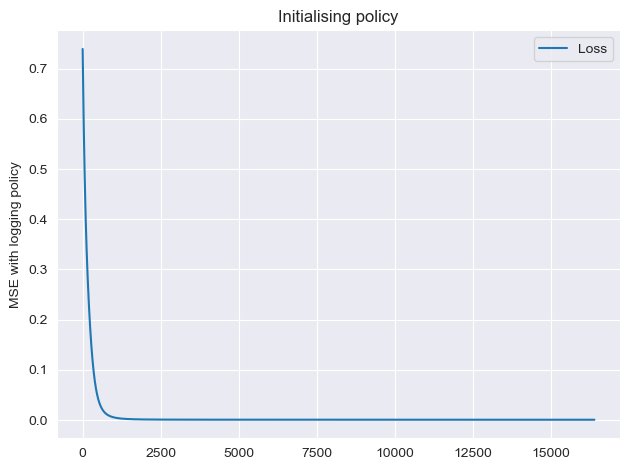

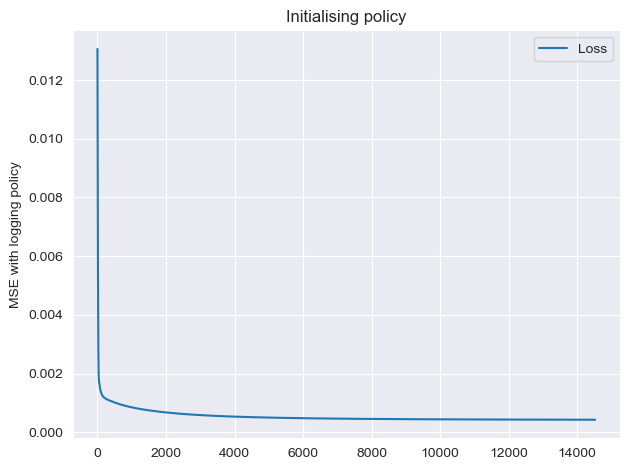

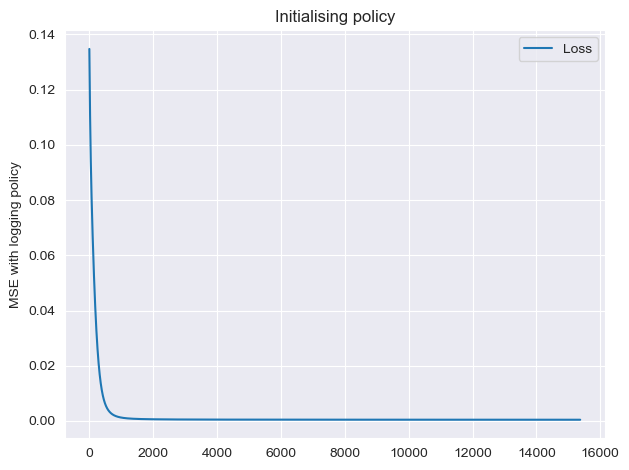

In [8]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}

data_split_line = [0, 0.8, 0.9, 1]

all_data = {agent_id: [] for agent_id in range(agent_num)}

adaptive_training = [33333, 33333, 33334]

for i in range(3):
    if i == 0 or i == 2:
        for _ in range(adaptive_training[i]):
            auction.simulate_opportunity()
    elif i == 1:
        auction.agents.extend(agents_part2)
        auction.num_participants_per_round = 4
        auction.agent2items.update(agents2items_part2)
        auction.agents2item_values.update(agents2item_values_part2)
        for _ in range(adaptive_training[i]):
            auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]

        temp_data = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))

        all_data[agent_id].append(temp_data)

        if i == 1 or i ==2:
            agent.update(iteration = 2+i)
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

for agent_id, data in all_data.items():
    data = np.concatenate(data, axis=0)

    for j, data_set in enumerate(offline_data.keys()):
        offline_data[data_set][agent_id] = data[int(data_split_line[j]*len(data)):int(data_split_line[j+1]*len(data)), :]

In [9]:
offline_data

{'train': {0: array([[1.0040709274018904, -0.4301965769164844, -0.5040232416285816,
          ..., False, 0, 0.0],
         [-0.8730489706932605, -0.4354070444510516, 2.4403342098095635,
          ..., False, 0, 0.0],
         [1.7713311316515392, 0.5010083280349797, -1.5001582364954682, ...,
          True, 0, -0.33113513324500177],
         ...,
         [1.101682249629406, 0.250284326325613, -0.16802325520499942, ...,
          False, 0, 0.0],
         [0.5452584539715445, 0.3804830759095046, 1.9573076318144864, ...,
          False, 0, 0.0],
         [-1.637726529455759, 0.3514667369623003, 0.6400152131763128, ...,
          False, 0, 0.0]], dtype=object),
  1: array([[-0.3090474717722966, 1.7683099394882147, 0.5720000377092516, ...,
          True, 0, -0.5101624322318306],
         [1.7713311316515392, 0.5010083280349797, -1.5001582364954682, ...,
          False, 0, 0.0],
         [-1.0671881497265185, 0.5470780043034422, -0.5321893820943414,
          ..., False, 0, 0.0],
      

In [10]:
 for agent_id in range(agent_num):
    for j, data_set in enumerate(offline_data.keys()):
        offline_data[data_set][agent_id][:, 8] = offline_data[data_set][agent_id][:, 8].astype(float)

In [11]:
pickle.dump(auction, open(f'DR_L_auction_{special}_part2.pickle', 'wb'))

# Save Data

In [18]:
special

'adaptiveTrain_extra_3_parti_4'

In [19]:
data_dir = f"../data_{estimator}_{competition}_{special}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [21]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special='_'+special)

# Read data

In [3]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [4]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [6]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [28]:
#for agent_id in offline_data['train'].keys():
agent_id = 0
min_split_int = 50
for max_depth in [10, 20, 35, 50]:
        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory=f"../data_DR_L_split_1000_{special}/train/")

        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
        print("Agent", agent_id)
        print("Max Depth", max_depth)
        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['test'][agent_id][:, :5]
        label_val_data = offline_data['test'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='test')
        print("Train R2 score:", r2_score(label_train_data, train_preds))
        print("Val R2 score:", r2_score(label_val_data, val_preds))
        print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
        print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

Agent 0
Max Depth 10
<ipykernel.iostream.OutStream object at 0x106257b50> starting from 53
<ipykernel.iostream.OutStream object at 0x106257b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106257b50> starting from 53
<ipykernel.iostream.OutStream object at 0x106257b50> finishing read tree
Train R2 score: 0.6875393919310683
Val R2 score: 0.15463069656152273
Train MSE:  0.011622906052045563
Val MSE:  0.03320172145969138
Agent 0
Max Depth 20
<ipykernel.iostream.OutStream object at 0x106257b50> starting from 53
<ipykernel.iostream.OutStream object at 0x106257b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106257b50> starting from 53
<ipykernel.iostream.OutStream object at 0x106257b50> finishing read tree
Train R2 score: 0.7668137646755928
Val R2 score: 0.2444006698806418
Train MSE:  0.00867405885995029
Val MSE:  0.0296760225285115
Agent 0
Max Depth 35
<ipykernel.iostream.OutStream object at 0x106257b50> starting from 53
<ipykernel.iostream.OutStream obje

FileNotFoundError: [Errno 2] No such file or directory: '/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L_adaptiveTrain_extra_3_parti_4/agent_0/model_boost_linear_save_1000_max_hist_10000_max_depth_50_min_split_instances_50/pickle_Game_File_53.p'

In [58]:
datrain_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_0/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='train')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [34]:
test_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_2/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='test')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [38]:
print("Train MSE: ", mean_squared_error(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test MSE: ", mean_squared_error(offline_data['test'][2][:, 7], test_preds_CUTree_1000))
print("Train R2", r2_score(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test R2", r2_score(offline_data['test'][2][:, 7], test_preds_CUTree_1000))

Train MSE:  0.0018965843856246472
Test MSE:  0.001954897140573292
Train R2 0.2662253759843558
Test R2 0.26324481410297074


# M5 Tree

In [12]:
from m5py import M5Prime, export_text_m5

In [13]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [14]:
param_grid = {
    'max_depth': [ 10, 20, 35 ]
    #'min_samples_split': [2, 4, 10, 20, 36, 50]
}

In [15]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [16]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, 7].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :5].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, 7].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :5].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, 7].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.37448722416959757
Test R2 score: 0.3730264197805039
Train MSE:  0.006112507397116507
Test MSE:  0.024624270231203314
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.7634185765959751
Test R2 score: 0.7623138834462305
Train MSE:  0.0031710818928847714
Test MSE:  0.007924633377446276
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.7427080199330898
Test R2 score: 0.7625889724690698
Train MSE:  0.0034378831699662105
Test MSE:  0.011975392835536064
Agent 3
Param for GS {'max_depth': 10}
R2 score for GS -3.788587251223478
Test R2 score: -3.856771245198881
Train MSE:  0.19838262248653998
Test MSE:  0.27784576421534096
Agent 4
Param for GS {'max_depth': 10}
R2 score for GS -3.426575054572857
Test R2 score: -3.541322107066417
Train MSE:  0.1019533936144838
Test MSE:  0.12658235903686973
Agent 5
Param for GS {'max_depth': 10}
R2 score for GS -4.551766956530749
Test R2 score: -4.748188403795497
Train MSE:  0.238603050653787

In [17]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 10}
R2 score for GS 0.3350417471099144
Test R2 score: 0.31979191158685294
Train MSE:  0.008467447659343994
Test MSE:  0.026715045595177584
Agent 1
Param for GS {'max_depth': 10}
R2 score for GS 0.6845453104485015
Test R2 score: 0.6946605185086024
Train MSE:  0.005294116112290132
Test MSE:  0.010180247300777797
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.7007527163845257
Test R2 score: 0.7262233847799331
Train MSE:  0.0009492693502599258
Test MSE:  0.013809731378280496
Agent 3
Param for GS {'max_depth': 10}
R2 score for GS -3.965316151024731
Test R2 score: -4.1300271961916275
Train MSE:  0.18624040791035895
Test MSE:  0.29347816786313935
Agent 4
Param for GS {'max_depth': 10}
R2 score for GS -3.644408952190017
Test R2 score: -3.6833813695982833
Train MSE:  0.09768582029303305
Test MSE:  0.130542042175474
Agent 5
Param for GS {'max_depth': 10}
R2 score for GS -4.800239792722357
Test R2 score: -4.923780342900745
Train MSE:  0.224783845141387

In [27]:
offline_data['train'][2][:, 7].std()

0.2587533890799266

In [28]:
offline_data['train'][1][:, 7].st

AttributeError: 'numpy.ndarray' object has no attribute 'st'

In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

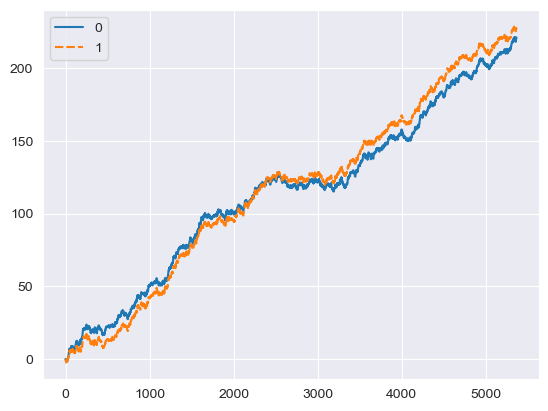

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

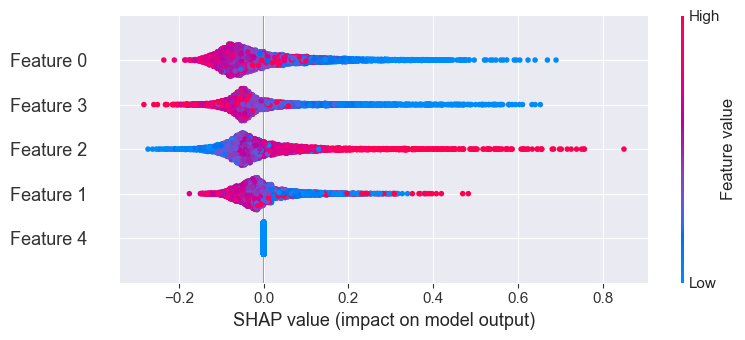

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2